In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# Load the combined dataset
data = pd.read_csv('../data/combined_solar_data.csv')

# Preview the dataset
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


In [3]:
# Summary statistics for numeric columns
summary_stats = data.describe()
print(summary_stats)

                GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.536357e+00  1.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing Values:
 Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
Country                0
dtype: int64
Number of duplicate rows: 0


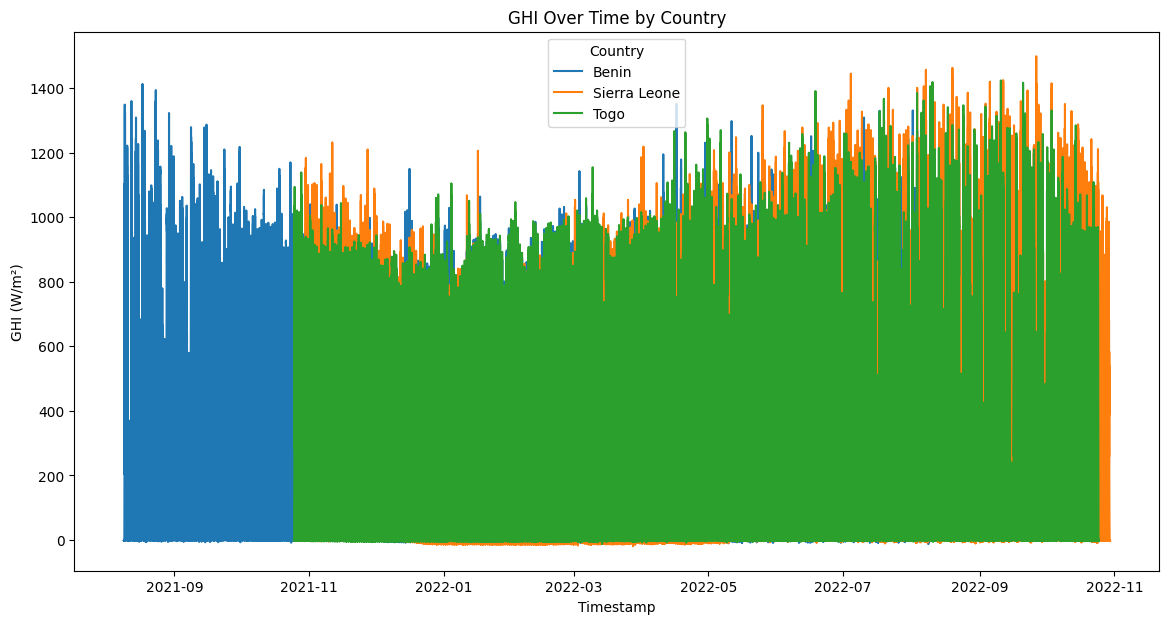

In [5]:
# Convert 'Timestamp' to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plot GHI over time for each country
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Timestamp', y='GHI', hue='Country')
plt.title("GHI Over Time by Country")
plt.xlabel("Timestamp")
plt.ylabel("GHI (W/m²)")
plt.show()

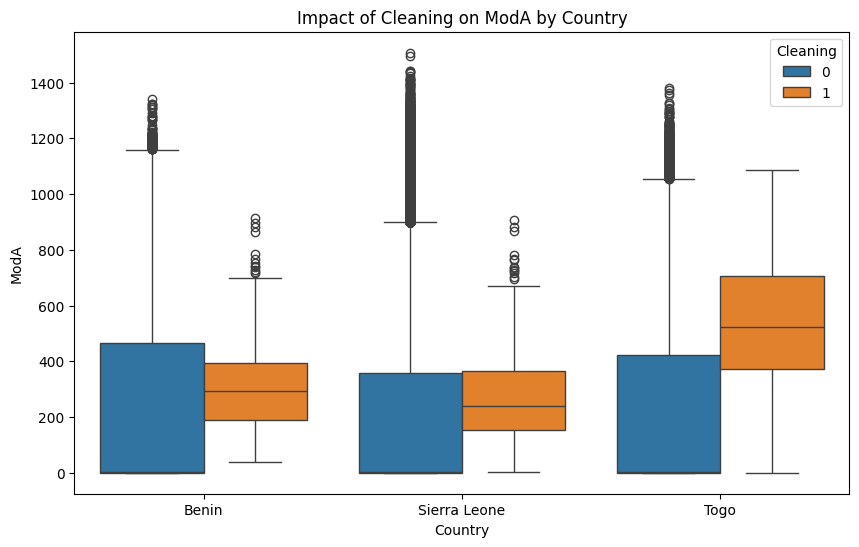

In [6]:
# Evaluate the impact of cleaning on ModA for each country
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Country', y='ModA', hue='Cleaning')
plt.title("Impact of Cleaning on ModA by Country")
plt.show()


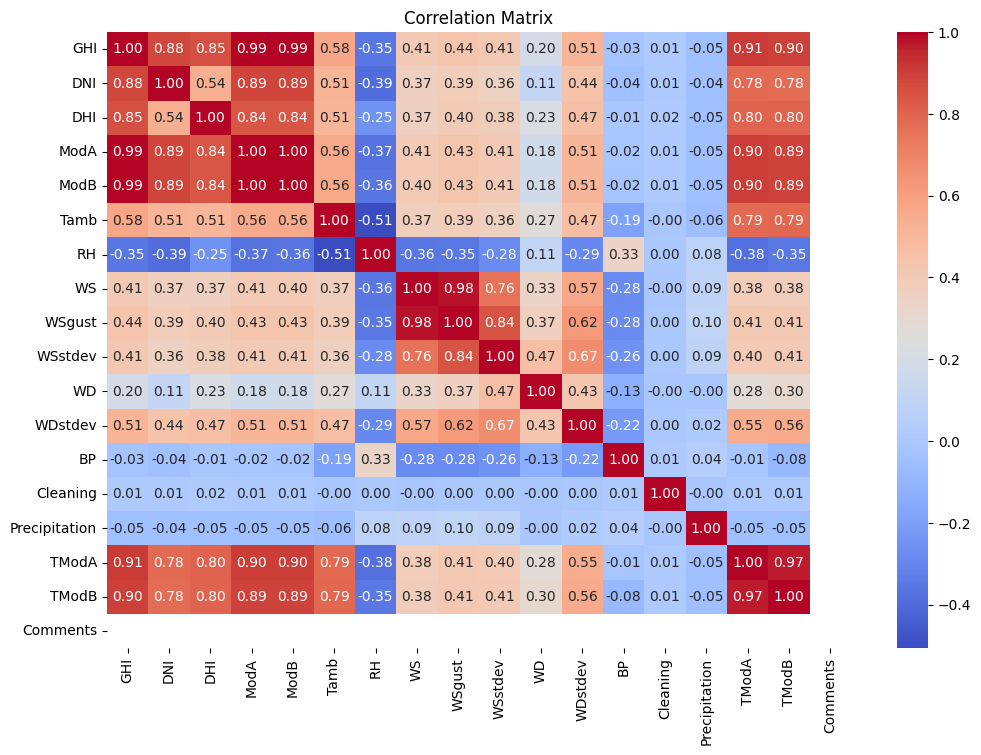

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute and visualize correlations for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


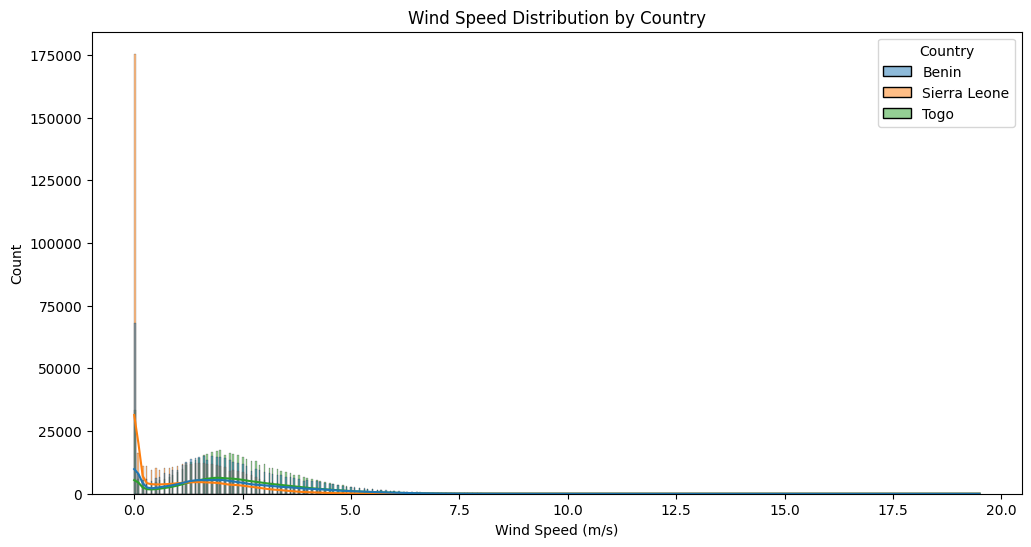

In [9]:
# Visualize wind speed distribution by country
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='WS', hue='Country', kde=True)
plt.title("Wind Speed Distribution by Country")
plt.xlabel("Wind Speed (m/s)")
plt.show()

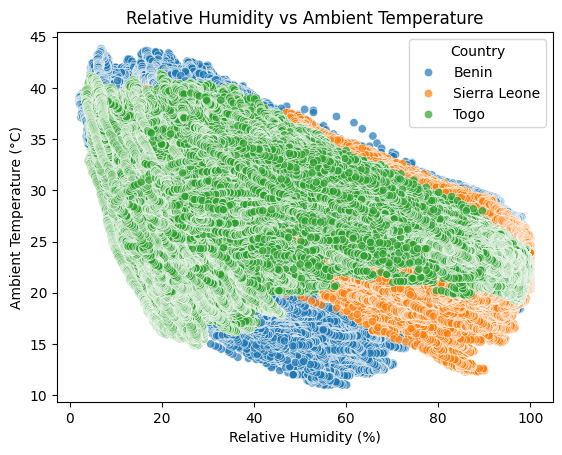

In [10]:
# Analyze relationship between relative humidity (RH) and ambient temperature (Tamb)
sns.scatterplot(data=data, x='RH', y='Tamb', hue='Country', alpha=0.7)
plt.title("Relative Humidity vs Ambient Temperature")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()


In [11]:
# Remove rows with significant missing values (if needed)
cleaned_data = data.dropna()

# Save the cleaned dataset
cleaned_data.to_csv('../data/cleaned_combined_solar_data.csv', index=False)
